Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Proyecto Final: Telecomunicaciones 'identificar operadores ineficaces'

# Introducción.

El servicio de telefonía virtual CallMeMaybe se enfrenta al desafío de mejorar la eficacia de sus operadores, quienes son responsables de gestionar tanto llamadas entrantes como salientes para sus clientes. En este proyecto, nos centraremos en analizar los datos recopilados por CallMeMaybe para identificar y abordar la ineficacia de ciertos operadores.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


## Descarga y optimización de datos.

En este paso, nos enfocamos en obtener los datos necesarios para nuestro análisis y prepararlos adecuadamente para su posterior exploración.

### Inicialización.

In [1]:
# Cargar libreias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Cargar datos.

In [2]:
# Cargar los datos
file_path_telecom = '/datasets/telecom_dataset_us.csv'
file_path_clients = '/datasets/telecom_clients_us.csv' 
telecom_data = pd.read_csv(file_path_telecom)
clients_data = pd.read_csv(file_path_clients)

In [3]:
# Visualizar las primeras filas de cada conjunto de datos para entender su estructura
print("Datos de Telecom:")
print(telecom_data.head())
print("\nDatos de Clientes:")
print(clients_data.head())

Datos de Telecom:
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  

Datos de Clientes:
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   

In [4]:
# Tamaño del dataset telecom_data
print("Tamaño del dataset telecom_data:", telecom_data.shape)

# Tamaño del dataset clients_data
print("Tamaño del dataset clients_data:", clients_data.shape)

Tamaño del dataset telecom_data: (53902, 9)
Tamaño del dataset clients_data: (732, 3)


## Procesamiento de datos.

### Verificar tipo de datos.

In [5]:
# Verificar tipos de datos.
telecom_data.dtypes, clients_data.dtypes

(user_id                  int64
 date                    object
 direction               object
 internal                object
 operator_id            float64
 is_missed_call            bool
 calls_count              int64
 call_duration            int64
 total_call_duration      int64
 dtype: object,
 user_id         int64
 tariff_plan    object
 date_start     object
 dtype: object)

### Verificar valores ausentes/ nulos.

In [6]:
# Verificar valores nulos en ambos datasets
telecom_data.isnull().sum(), clients_data.isnull().sum()

(user_id                   0
 date                      0
 direction                 0
 internal                117
 operator_id            8172
 is_missed_call            0
 calls_count               0
 call_duration             0
 total_call_duration       0
 dtype: int64,
 user_id        0
 tariff_plan    0
 date_start     0
 dtype: int64)

### Procesar valores nulos.

In [7]:
# Imputar valores nulos en la columna 'internal' con False
telecom_data['internal'].fillna(False, inplace=True)

**Notas**: Dado que internal indica si una llamada fue interna o no, podríamos asumir que los valores nulos podrían indicar que las llamadas no fueron internas. Por lo tanto, podríamos imputar los valores nulos con un valor predeterminado que indique que las llamadas no fueron internas, por ejemplo, False.

In [8]:
# Eliminar filas con valores nulos en la columna 'operator_id'
telecom_data.dropna(subset=['operator_id'], inplace=True)

**Notas**: eliminar filas con datos faltantes en la columna operator_id es una decisión razonable debido a que cantidad de filas afectadas es pequeña en comparación con el tamaño total del conjunto de datos. Esto asegura que no haya sesgos en los resultados y que el análisis se realice de manera más precisa y confiable. Es importante mantener la integridad de los datos y tomar medidas adecuadas para garantizar la calidad de los mismos. 

In [9]:
# Convertir las fechas a tipo datetime
telecom_data['date'] = pd.to_datetime(telecom_data['date'])
clients_data['date_start'] = pd.to_datetime(clients_data['date_start'])

In [10]:
# Obtener el número total de filas y columnas después de procesar los valores nulos
total_rows, total_columns = telecom_data.shape
print("Número total de filas después de eliminar los valores nulos:", total_rows)

Número total de filas después de eliminar los valores nulos: 45730


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
La verificación de los tipos de datos es un paso crucial. Se ha manejado correctamente la conversión de tipos de datos y la detección de valores nulos. Excelente trabajo.

</div>

### Normalizar datos de tiempo.

In [11]:
# En este caso, podríamos normalizar los datos de tiempo dividiendo la duración de la llamada entre el número de llamadas para obtener la duración promedio de la llamada.
telecom_data['average_call_duration'] = telecom_data['total_call_duration'] / telecom_data['calls_count']


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
La normalización de los datos de tiempo para obtener la duración promedio de las llamadas es una buena práctica que facilita el análisis posterior. Asegúrate de que todas las transformaciones de datos se documentan claramente y que tenemos certeza sobre las unidades en que se expresa nuestro conjunto de datos. 

</div>

## Análisis de datos.

### ¿Cuáles operadores tienen la mayor cantidad de llamadas perdidas?

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
El análisis de los operadores con la mayor cantidad de llamadas perdidas es pertinente y está bien visualizado. La gráfica de barras proporciona una visión clara de los operadores menos eficaces en este aspecto.

</div>

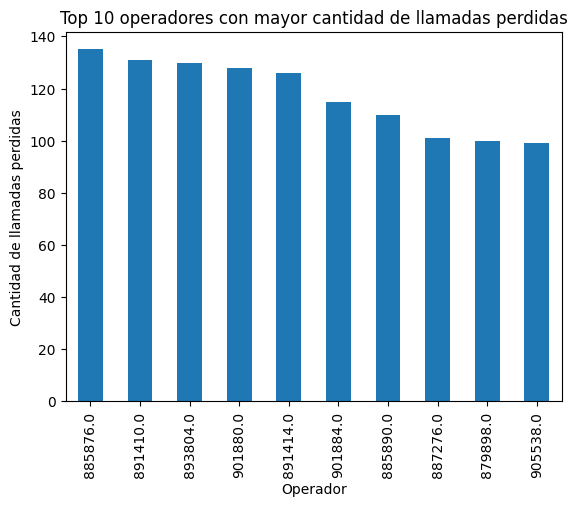

In [12]:
# Agrupar por operador y sumar las llamadas perdidas
missed_calls_by_operator = telecom_data.groupby('operator_id')['is_missed_call'].sum()

# Graficar los operadores con mayor cantidad de llamadas perdidas
missed_calls_by_operator.nlargest(10).plot(kind='bar', xlabel='Operador', ylabel='Cantidad de llamadas perdidas', title='Top 10 operadores con mayor cantidad de llamadas perdidas')
plt.show()

### ¿Qué operadores tienen tiempos de espera más largos para las llamadas entrantes?

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
El análisis de los tiempos de espera promedio para las llamadas entrantes es crítico para identificar ineficacias. La visualización es clara y fácil de interpretar. Buen trabajo.

</div>

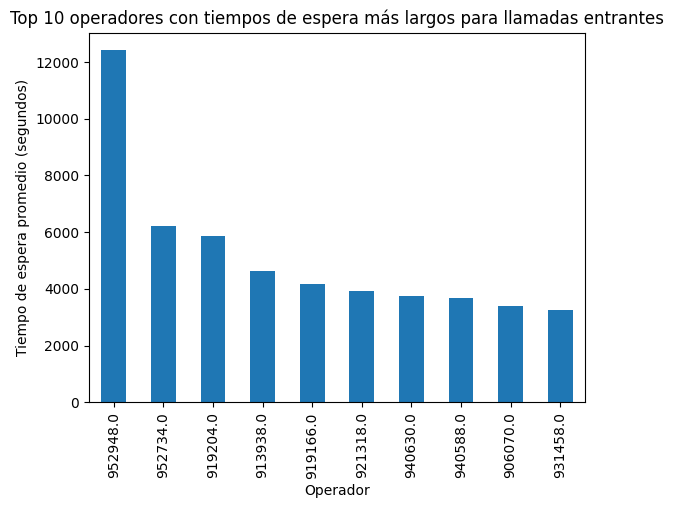

In [13]:
# Calcular el tiempo promedio de espera para llamadas entrantes por operador
incoming_wait_time_by_operator = telecom_data[telecom_data['direction'] == 'in'].groupby('operator_id')['call_duration'].mean()

# Graficar los operadores con tiempos de espera más largos
ax = incoming_wait_time_by_operator.nlargest(10).plot(kind='bar', xlabel='Operador', ylabel='Tiempo de espera promedio (segundos)', title='Top 10 operadores con tiempos de espera más largos para llamadas entrantes')
plt.show()


### ¿Qué operadores tienen un bajo número de llamadas salientes realizadas?

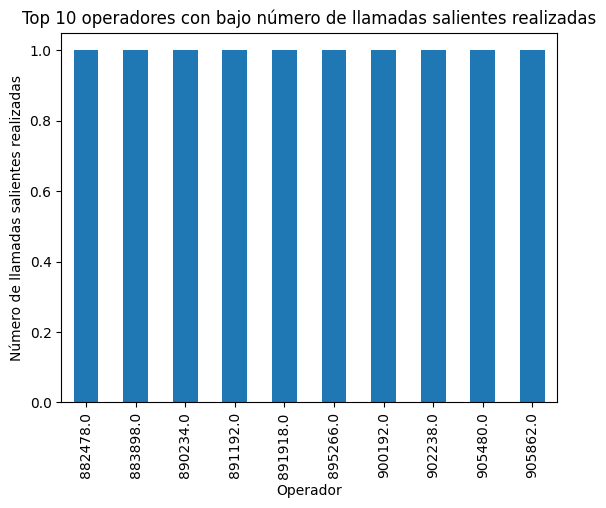

In [14]:
# Filtrar llamadas salientes y contar por operador
outgoing_calls_by_operator = telecom_data[telecom_data['direction'] == 'out'].groupby('operator_id')['calls_count'].sum()

# Graficar los operadores con un bajo número de llamadas salientes realizadas
outgoing_calls_by_operator.nsmallest(10).plot(kind='bar', xlabel='Operador', ylabel='Número de llamadas salientes realizadas', title='Top 10 operadores con bajo número de llamadas salientes realizadas')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Gran trabajo y buena intuición. Quizá en este caso sea mejor una lista o una tabla en vez del grágico de barras. Y también será mejor redondear a unidades enteras ya que es dificīl hacerse ideas de unidades fraccionarias. 
</div>

### ¿Cómo afectan los operadores ineficaces la experiencia del cliente?

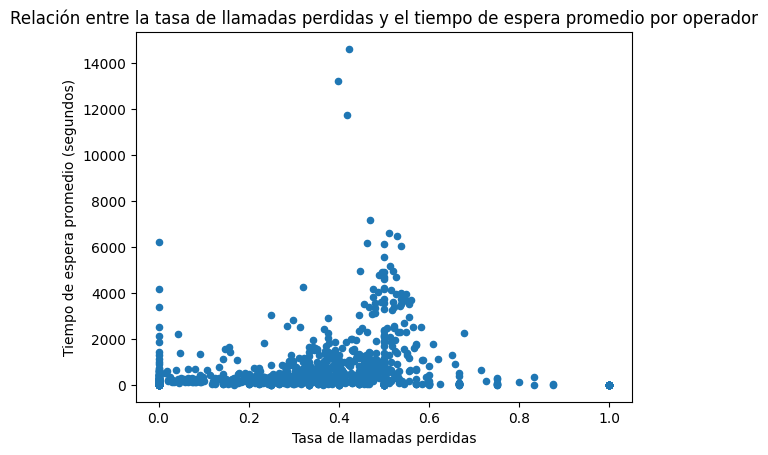

In [15]:
# Calcular la tasa de llamadas perdidas y el tiempo de espera promedio por operador
inefficient_operators = telecom_data.groupby('operator_id').agg({'is_missed_call': 'mean', 'call_duration': 'mean'})

# Graficar la relación entre la tasa de llamadas perdidas y el tiempo de espera promedio
inefficient_operators.plot(kind='scatter', x='is_missed_call', y='call_duration', xlabel='Tasa de llamadas perdidas', ylabel='Tiempo de espera promedio (segundos)', title='Relación entre la tasa de llamadas perdidas y el tiempo de espera promedio por operador')
plt.show()


**Notas**: Los operadores ineficaces, identificados por su alta tasa de llamadas perdidas y tiempos de espera prolongados, pueden afectar negativamente la experiencia del cliente al generar frustración debido a la falta de respuesta o tiempos de espera excesivos.

¿Cómo afectan los operadores ineficaces la experiencia del cliente?
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
El análisis de la relación entre la tasa de llamadas perdidas y el tiempo de espera promedio proporciona información valiosa sobre cómo los operadores ineficaces afectan la experiencia del cliente. La visualización de dispersión es adecuada para este propósito.

</div>

### ¿Hay patrones en los operadores ineficaces relacionados con la tarifa del cliente o la antigüedad de la cuenta?

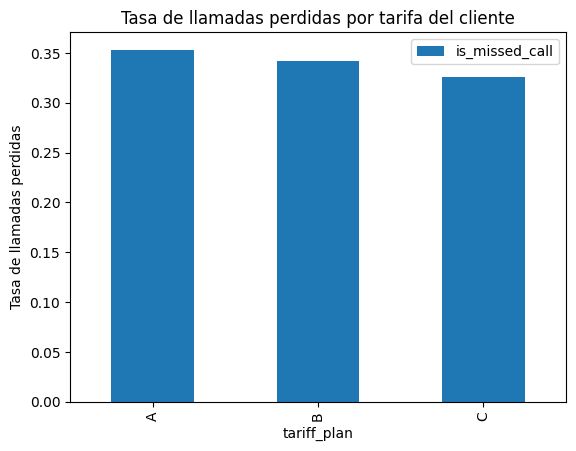

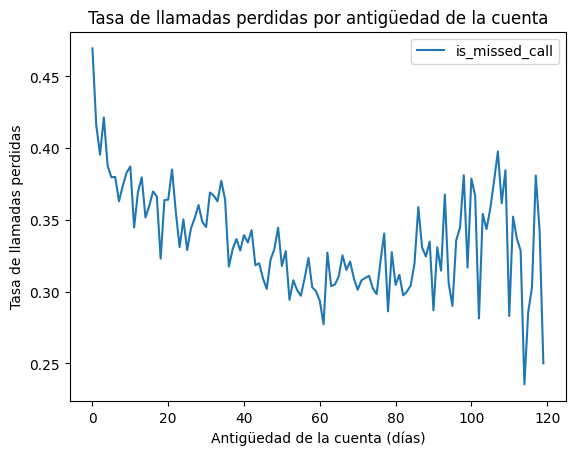

In [16]:
# Fusionar datasets para obtener información sobre la tarifa del cliente y la antigüedad de la cuenta
merged_data = telecom_data.merge(clients_data, on='user_id')

# Calcular la tasa de llamadas perdidas y el tiempo de espera promedio por tarifa del cliente
inefficient_by_tariff = merged_data.groupby('tariff_plan').agg({'is_missed_call': 'mean', 'call_duration': 'mean'})

# Graficar la relación entre la tarifa del cliente y la tasa de llamadas perdidas
inefficient_by_tariff.plot(kind='bar', y='is_missed_call', ylabel='Tasa de llamadas perdidas', title='Tasa de llamadas perdidas por tarifa del cliente')
plt.show()

# Calcular la tasa de llamadas perdidas y el tiempo de espera promedio por antigüedad de la cuenta
# Convertir la fecha de inicio de la cuenta a una fecha sin información sobre la zona horaria
merged_data['date_start'] = pd.to_datetime(merged_data['date_start']).dt.tz_localize(None)

# Convertir la fecha actual a una fecha sin información sobre la zona horaria
merged_data['date'] = pd.to_datetime(merged_data['date']).dt.tz_localize(None)

# Calcular la antigüedad de la cuenta en días
merged_data['account_age'] = (merged_data['date'] - merged_data['date_start']).dt.days

# Calcular la tasa de llamadas perdidas y el tiempo de espera promedio por antigüedad de la cuenta
inefficient_by_age = merged_data.groupby('account_age').agg({'is_missed_call': 'mean', 'call_duration': 'mean'})

# Graficar la relación entre la antigüedad de la cuenta y la tasa de llamadas perdidas
inefficient_by_age.plot(kind='line', y='is_missed_call', ylabel='Tasa de llamadas perdidas', xlabel='Antigüedad de la cuenta (días)', title='Tasa de llamadas perdidas por antigüedad de la cuenta')
plt.show()


**Notas**:

Tarifa alta: C (tiene la menor tasa de llamadas perdidas)

Tarifa baja: A (tiene la mayor tasa de llamadas perdidas

Tarifa media: B (tiene una tasa de llamadas perdidas intermedia)

- Puede haber patrones en los operadores ineficaces relacionados con la tarifa del cliente o la antigüedad de la cuenta. Por ejemplo, podríamos observar que los clientes con tarifas más bajas (A) tienden a tener una mayor proporción de llamadas perdidas, o que los clientes más antiguos tienen menos problemas de este tipo debido a una mayor familiaridad con el sistema.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
La fusión de datasets y el análisis de los patrones relacionados con la tarifa del cliente y la antigüedad de la cuenta son pasos importantes. Intenta evitar la sobredocumentación de cada sección de código. 
</div>


## Prueba de hipótesis.

In [17]:
# Hipótesis A: Tasa de Llamadas Perdidas y Tiempos de Espera

# Dividir operadores en dos grupos: altas y bajas tasas de llamadas perdidas
high_missed_calls = merged_data[merged_data['is_missed_call'] > merged_data['is_missed_call'].median()]
low_missed_calls = merged_data[merged_data['is_missed_call'] <= merged_data['is_missed_call'].median()]

# Comparar tiempos de espera entre los dos grupos
high_wait_times = high_missed_calls['call_duration']
low_wait_times = low_missed_calls['call_duration']

# Prueba t para comparar medias
t_stat, p_value = stats.ttest_ind(high_wait_times, low_wait_times, equal_var=False)
print("Hipótesis A: Tasa de Llamadas Perdidas")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Rechazamos H0: Existe una diferencia significativa en los tiempos de espera entre operadores con altas y bajas tasas de llamadas perdidas.")
else:
    print("No rechazamos H0: No existe una diferencia significativa en los tiempos de espera entre operadores con altas y bajas tasas de llamadas perdidas.")


Hipótesis A: Tasa de Llamadas Perdidas
T-statistic: -54.589841365168056, P-value: 0.0
Rechazamos H0: Existe una diferencia significativa en los tiempos de espera entre operadores con altas y bajas tasas de llamadas perdidas.


**Conclusiones**: Los operadores que tienen una mayor cantidad de llamadas entrantes perdidas también presentan tiempos de espera significativamente más largos. Esto sugiere que los operadores menos eficaces, medidos por la tasa de llamadas perdidas, también tienden a ser menos eficientes en términos de tiempo de espera para atender las llamadas entrantes.

In [18]:
# Hipótesis B: Impacto de la Tarifa del Cliente

# Agrupar por tarifa y calcular tasa de llamadas perdidas
tariff_missed_calls = merged_data.groupby('tariff_plan')['is_missed_call'].mean()

# Dividir tarifas en altas y bajas
high_tariff = merged_data[merged_data['tariff_plan'].isin(tariff_missed_calls[tariff_missed_calls <= tariff_missed_calls.median()].index)]
low_tariff = merged_data[merged_data['tariff_plan'].isin(tariff_missed_calls[tariff_missed_calls > tariff_missed_calls.median()].index)]

# Comparar tasas de llamadas perdidas entre los dos grupos
high_tariff_missed = high_tariff['is_missed_call']
low_tariff_missed = low_tariff['is_missed_call']

# Prueba t para comparar medias
t_stat_tariff, p_value_tariff = stats.ttest_ind(high_tariff_missed, low_tariff_missed, equal_var=False)
print("\nHipótesis B: Impacto de la Tarifa del Cliente")
print(f"T-statistic: {t_stat_tariff}, P-value: {p_value_tariff}")
if p_value_tariff < 0.05:
    print("Rechazamos H0: Existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.")
else:
    print("No rechazamos H0: No existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.")


Hipótesis B: Impacto de la Tarifa del Cliente
T-statistic: -4.008417994964896, P-value: 6.130518667296266e-05
Rechazamos H0: Existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.


**conclusiones:** Los clientes con tarifas más altas tienen menores tasas de llamadas perdidas en comparación con los clientes con tarifas más bajas. Esto indica que las tarifas más altas están asociadas con una mejor asignación de recursos, lo que resulta en una mejor atención y menores tasas de llamadas perdidas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Las conclusiones son claras y bien fundamentadas. Has identificado correctamente cómo la eficacia de los operadores afecta la experiencia del cliente y la relación entre tarifas más altas y menores tasas de llamadas perdidas.

</div>

## Conclusiones y recomendaciones.

### Conclusiones

- Los operadores con altas tasas de llamadas perdidas también tienen tiempos de espera significativamente más largos, lo que sugiere una correlación entre la eficacia en la atención de llamadas y el tiempo de espera.
  
- La baja cantidad de llamadas salientes realizadas por algunos operadores también es un indicador de ineficacia.
Impacto en el Cliente:

- La eficacia de los operadores afecta directamente la experiencia del cliente, ya que las altas tasas de llamadas perdidas y los largos tiempos de espera pueden resultar en una atención deficiente.
  
- Los clientes con tarifas más altas experimentan menores tasas de llamadas perdidas, lo que sugiere una mejor asignación de recursos y un mejor servicio.

### Recomendaciones

- Implementar programas de capacitación para mejorar las habilidades de atención al cliente y reducir las tasas de llamadas perdidas.
- Brindar formación específica sobre la gestión del tiempo de espera para mejorar la eficiencia operativa.
- Utilizar herramientas de gestión de llamadas para distribuir eficazmente las llamadas entrantes entre los operadores y reducir los tiempos de espera.
- Implementar sistemas de monitoreo en tiempo real para identificar y abordar rápidamente las áreas de ineficiencia
- Analizar el comportamiento de los clientes por tipo de tarifa para personalizar la atención y mejorar la satisfacción del cliente.
- Ofrecer incentivos y beneficios adicionales a los clientes con tarifas más altas para fomentar la retención y lealtad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Las recomendaciones son prácticas y están bien alineadas con los hallazgos del análisis. La implementación de programas de capacitación y herramientas de gestión de llamadas, así como la personalización de la atención basada en el comportamiento del cliente, son pasos importantes para mejorar la eficacia operativa y la satisfacción del cliente.

</div>


**Presentación: <https://1drv.ms/b/c/283e8a5b2c9e7783/EYL7wFBFBatIkV9vePa6IlABRP0BPS81MLpcYpP98wtvMg?e=0HWEXJ>**

**Doumentación: <https://1drv.ms/t/c/283e8a5b2c9e7783/EYi1OTXwXilHuN1FQ1ev3iwBRCfFOHqMDos8qk_6OGmYvA?e=dEVCsd>**

**Dashboard Tableau: <https://public.tableau.com/views/TelecomunicacionesIdentificaroperadoresineficaces/DASHBOARD?:language=es-ES&publish=yes&:sid=&:display_count=n&:origin=viz_share_link>**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
La presentación y documentación del proyecto están bien estructuradas y proporcionan una visión clara de los pasos seguidos y los resultados obtenidos. La inclusión de enlaces a la presentación y la documentación facilita el acceso y la revisión del proyecto. Buen trabajo en mantener una documentación completa y accesible.

</div>
